## Install packages

In [1]:
# install.packages('caTools', repos = 'https://cran.r-project.org')

## Importing libraries

In [2]:
library(caTools)  # for splitting data

Warning message:
"package 'caTools' was built under R version 3.4.3"

## Import the dataset

In [3]:
# Importing the dataset
dataset = read.csv('data/Salary_Data.csv')

In [4]:
dataset

YearsExperience,Salary
1.1,39343
1.3,46205
1.5,37731
2.0,43525
2.2,39891
2.9,56642
3.0,60150
3.2,54445
3.2,64445
3.7,57189


## Split dataset into train and test

## Splitting the dataset into the Training set and Test set

In [5]:
set.seed(123)
split = sample.split(dataset$Salary, SplitRatio = 2/3)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

# Feature Scaling
# training_set = scale(training_set)
# test_set = scale(test_set)

## Fitting Simple Linear Regression to the Training set

In [6]:
regressor = lm(formula = Salary ~ YearsExperience,
               data = training_set)



## Predicting the Test set results

In [7]:
y_pred = predict(regressor, newdata = test_set)

## Visualising the Training set results

Warning message:
"package 'ggplot2' was built under R version 3.4.3"

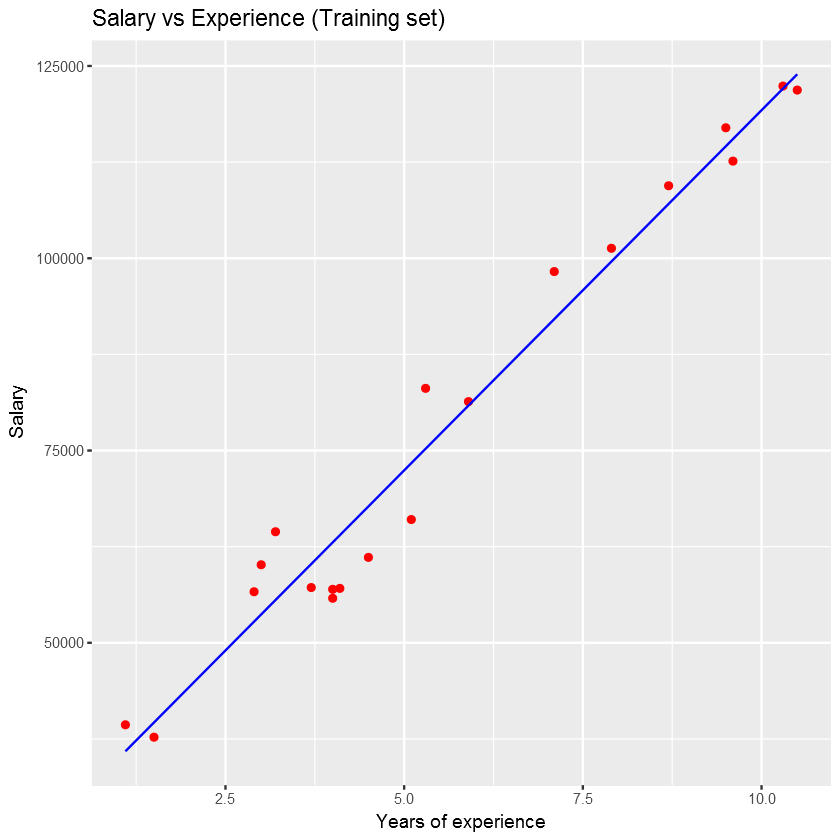

In [8]:
library(ggplot2)
ggplot() +
  geom_point(aes(x = training_set$YearsExperience, y = training_set$Salary),
             colour = 'red') +
  geom_line(aes(x = training_set$YearsExperience, y = predict(regressor, newdata = training_set)),
            colour = 'blue') +
  ggtitle('Salary vs Experience (Training set)') +
  xlab('Years of experience') +
  ylab('Salary')

## Visualising the Test set results

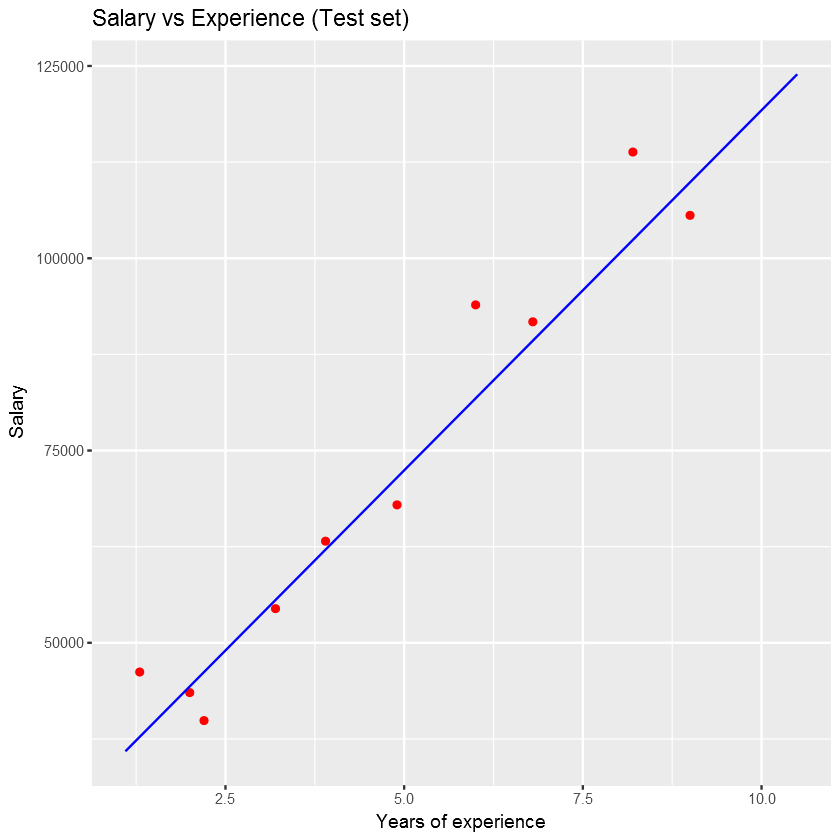

In [9]:
library(ggplot2)
ggplot() +
  geom_point(aes(x = test_set$YearsExperience, y = test_set$Salary),
             colour = 'red') +
  geom_line(aes(x = training_set$YearsExperience, y = predict(regressor, newdata = training_set)),
            colour = 'blue') +
  ggtitle('Salary vs Experience (Test set)') +
  xlab('Years of experience') +
  ylab('Salary')